In [91]:
%matplotlib inline
import matplotlib.pyplot as pl
import numpy as np
import seaborn as sns



In [ ]:
from sklearn

In [78]:
points = np.vstack(((np.random.randn(150, 2) * 0.75 + np.array([1, 0])),
                  (np.random.randn(50, 2) * 0.25 + np.array([-0.5, 0.5])),
                  (np.random.randn(50, 2) * 0.5 + np.array([-0.5, -0.5]))))

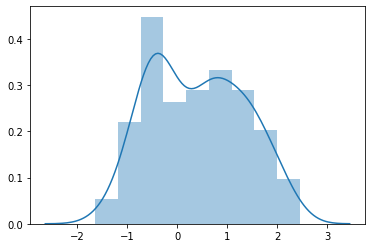

In [79]:
sns.distplot(points[:,0])

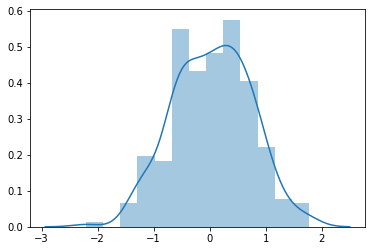

In [80]:
sns.distplot(points[:,1])

<IPython.core.display.Javascript object>

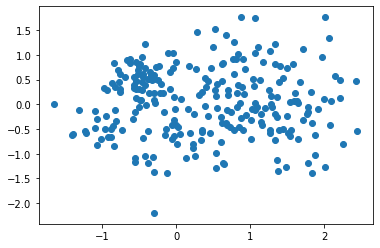

In [81]:
plt.scatter(points[:,0],points[:,1])

In [82]:
len(points)

250

# INITIALIZE CENTROIDS

In [83]:
def initialize_centroids(points,k):
    centroids=points.copy()
    np.random.shuffle(centroids)
    return centroids[:k]
    
centroids=initialize_centroids(points,3)
centroids

array([[ 1.49179318, -1.26506356],
       [ 0.9063251 , -0.51861252],
       [ 0.34269983, -0.56849944]])

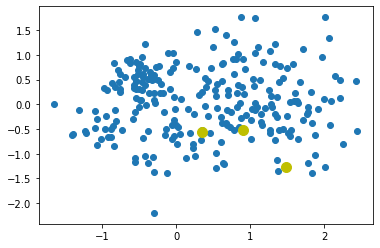

In [84]:
pl.scatter(points[:,0],points[:,1])
pl.scatter(centroids[:,0],centroids[:,1],c='y',s=100)

In [85]:
def closest_centroids(points,centroids):
    datas=[]
    for i in range(len(points)):
        temp_list=[]
        for j in range(len(centroids)):
            temp=np.sqrt((centroids[j][0]-points[i][0])**2+(centroids[j][1]-points[i][1])**2)
            temp_list.append(temp)
        datas.append(np.argmin(temp_list))
    return datas
centroids=np.array(initialize_centroids(points,3))
closest=np.array(closest_centroids(points,centroids))

print(closest)

[1 0 1 1 1 2 2 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1
 1 1 1 1 2 1 2 1 2 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 2 1 1 1 1 1 1 1 2 2 1 1
 1 0 2 1 1 1 1 1 2 2 1 1 0 1 0 2 1 0 1 2 1 1 1 1 1 1 2 1 1 1 1 1 2 0 1 1 0
 2 1 0 1 0 0 0 1 1 2 2 1 1 1 2 1 0 1 1 1 0 0 0 0 1 1 1 2 1 2 1 2 2 2 0 1 1
 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 1 0 0 2 0 0 0 2 0 2 1 0 1 0 0 1 0 0 2 2 2 0]


In [86]:
def move_centroids(points,closest,centroids):
    means=[]
    for i in range(len(centroids)):
        indexes=(points[closest==i]).mean(axis=0)
        means.append(indexes)
    return np.array(means)
moved=move_centroids(points,closest,centroids)
moved

array([[-0.02123641, -0.4673591 ],
       [ 0.47326518,  0.46713228],
       [ 0.83921459, -1.06278216]])

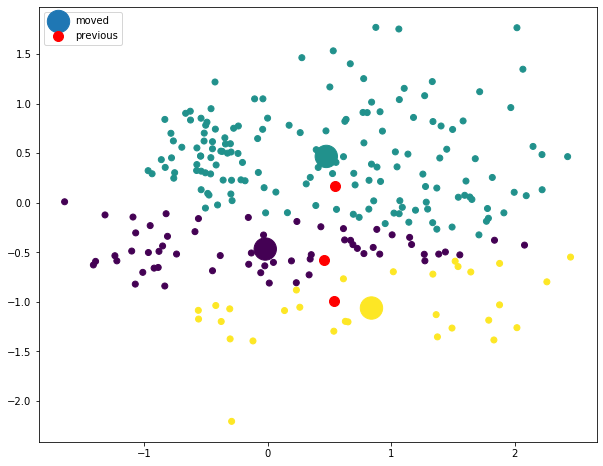

In [87]:
colors=closest.copy()
colors=(closest+10)*9.9
pl.figure(figsize=(10,8))
pl.scatter(points[:,0],points[:,1],c=colors)
pl.scatter(moved[:,0],moved[:,1],s=500,c=np.unique(colors),label='moved')
pl.scatter(centroids[:,0],centroids[:,1],s=100,c='red',label='previous')
pl.legend()

In [88]:
from JSAnimation import IPython_display
from matplotlib import animation

In [89]:
# fig = pl.figure()
# ax = pl.axes(xlim=(-4, 4), ylim=(-4, 4))
# centroids = initialize_centroids(points, 3)

# def init():
#     return 

# def animate():
#     global centroids
#     closest = closest_centroids(points, centroids)
#     centroids = move_centroids(points, closest, centroids)
#     ax.cla()
#     ax.scatter(points[:, 0], points[:, 1], c=closest)
#     ax.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)
#     return 

# animation.FuncAnimation(fig, animate, init_func=init,
#                         frames=10, interval=200, blit=True)

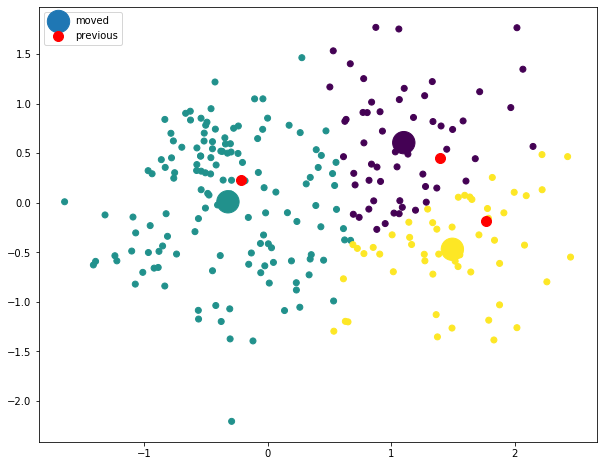

[[ 1.01952992  0.68444274]
 [-0.41453656 -0.0140427 ]
 [ 1.37157539 -0.4435148 ]]


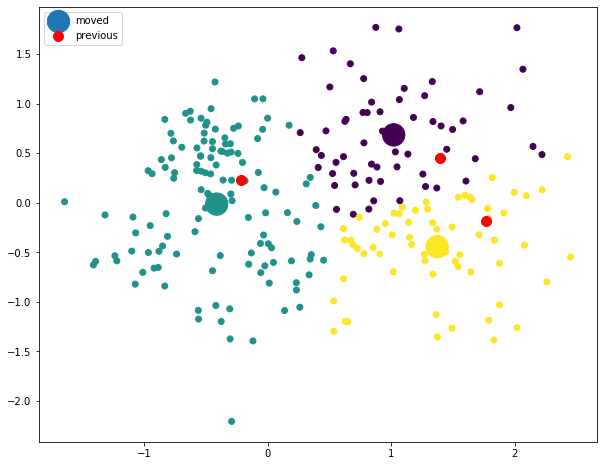

[[ 0.96714021  0.74045446]
 [-0.43590068 -0.02695237]
 [ 1.34023911 -0.41130081]]


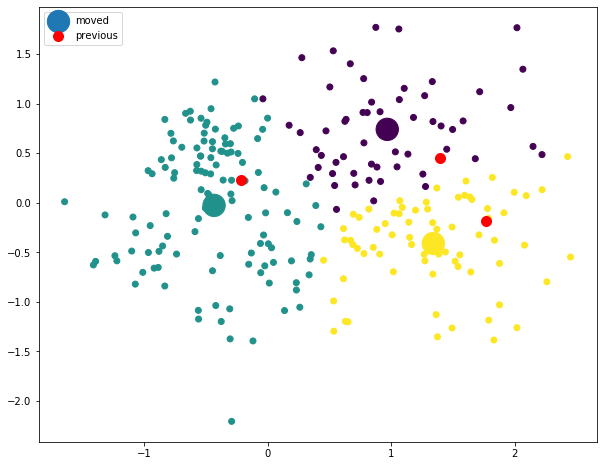

[[ 0.91201467  0.79012625]
 [-0.44230509 -0.04338486]
 [ 1.33424814 -0.38135342]]


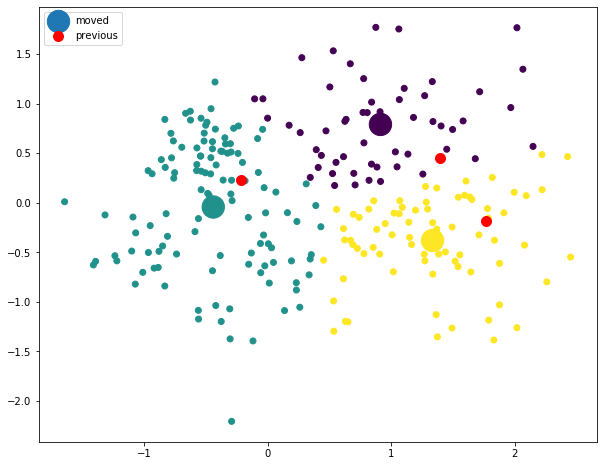

[[ 0.88954012  0.79416406]
 [-0.44230509 -0.04338486]
 [ 1.34495692 -0.36886131]]


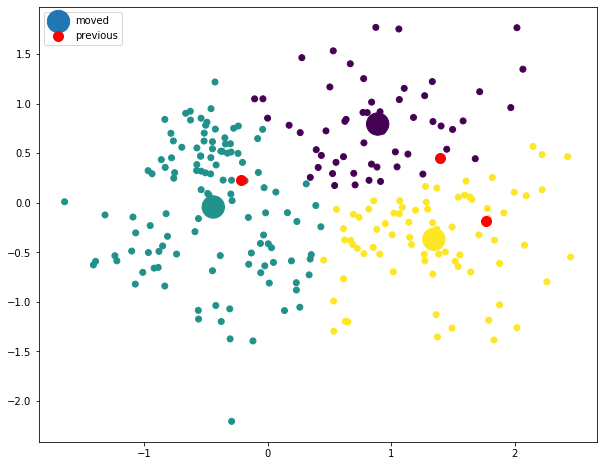

[[ 0.88954012  0.79416406]
 [-0.44230509 -0.04338486]
 [ 1.34495692 -0.36886131]]


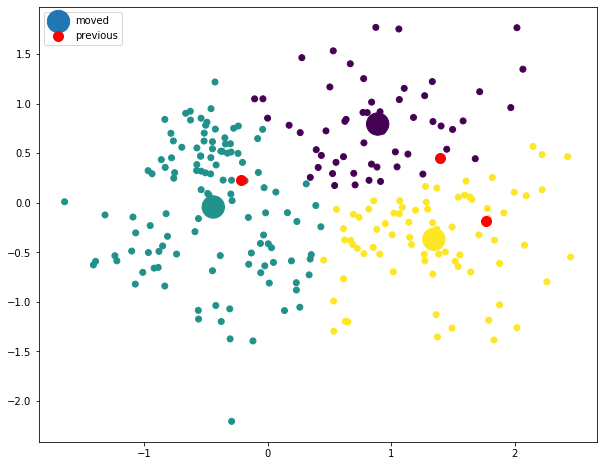

[[ 0.88954012  0.79416406]
 [-0.44230509 -0.04338486]
 [ 1.34495692 -0.36886131]]


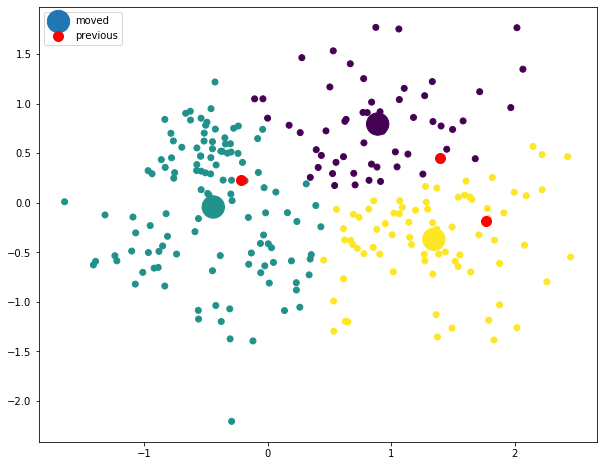

[[ 0.88954012  0.79416406]
 [-0.44230509 -0.04338486]
 [ 1.34495692 -0.36886131]]


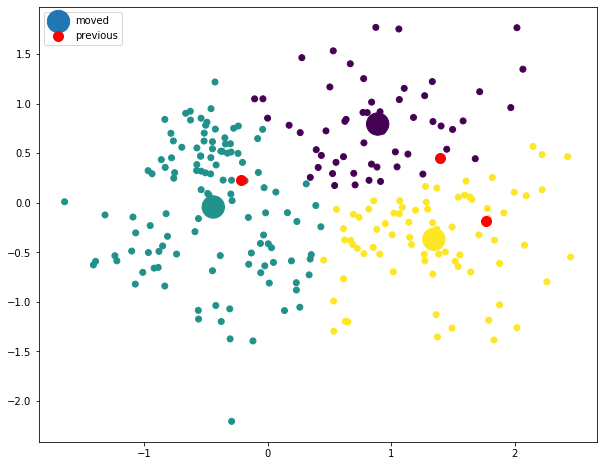

[[ 0.88954012  0.79416406]
 [-0.44230509 -0.04338486]
 [ 1.34495692 -0.36886131]]


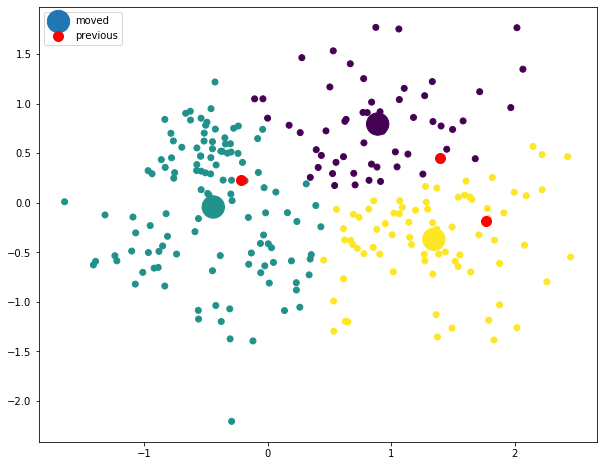

[[ 0.88954012  0.79416406]
 [-0.44230509 -0.04338486]
 [ 1.34495692 -0.36886131]]


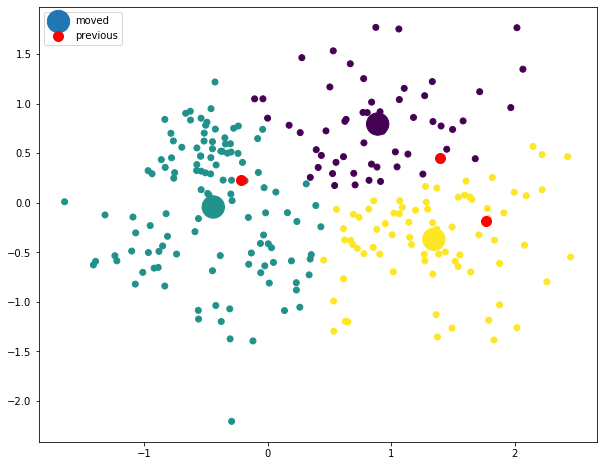

In [90]:
centroids=np.array(initialize_centroids(points,3))


moved=None
for i in range(10):
    if moved is None:
        closest=np.array(closest_centroids(points,centroids))
        moved=move_centroids(points,closest,centroids)
        
        colors=closest.copy()
        colors=(closest+10)*9.9
        pl.figure(figsize=(10,8))
        pl.scatter(points[:,0],points[:,1],c=colors)
        pl.scatter(moved[:,0],moved[:,1],s=500,c=np.unique(colors),label='moved')
        pl.scatter(centroids[:,0],centroids[:,1],s=100,c='red',label='previous')
        pl.legend()
        pl.show()
        
    else:
        closest=np.array(closest_centroids(points,moved))
        moved=move_centroids(points,closest,moved)
        print(moved)
        colors=closest.copy()
        colors=(closest+10)*9.9
        pl.figure(figsize=(10,8))
        pl.scatter(points[:,0],points[:,1],c=colors)
        pl.scatter(moved[:,0],moved[:,1],s=500,c=np.unique(colors),label='moved')
        pl.scatter(centroids[:,0],centroids[:,1],s=100,c='red',label='previous')
        pl.legend()
        pl.show()
